In [2]:
# Visualizacion de datos
import matplotlib.pylab as plt
import numpy as np
# Modelo de redes neuronales
from keras import layers, models
from keras.datasets import mnist

# One-Encoding
from keras.utils import to_categorical

2024-01-12 17:43:04.989479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

- **Train data**: Contiene datos de entrada para entrenar a tu modelo.

- **Train labels**: Contiene la clasificación de cada uno de los datos de Train data.

- **Test data**: Es una partición de datos con características similares a `Train data` pero que el modelo de DL NO conoció durante el proceso de entrenamiento.

- **Test labels**: Corresponde a la clasificación de los datos de Test data.

In [4]:
train_data.shape

(60000, 28, 28)

Podemos observar que nuestros datos de entrenamiento constan de un conjunto de *60,000* muestras de imágenes de 28x28, mientras que el conjunto de testing es de *10,000* muestras. Podemos observar que tanto en train como test los datos en este caso imágenes tienen las mismas dimensiones. Adicionalmente, vemos como las **labels** de ambos conjuntos son arreglos unidimencionales, pues solamente guardan la etiqueta con el nombre de la clase, en este caso un número.

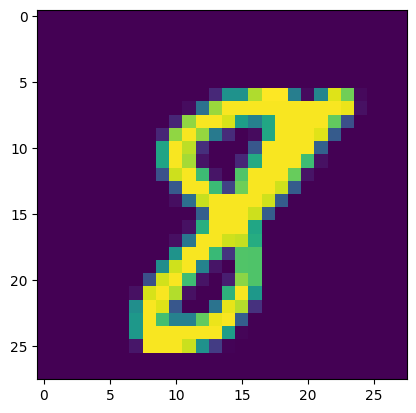

In [5]:
plt.imshow(train_data[55])

In [6]:
train_labels[55]

8

## Crear un simple Modelo Secuencial de 1 capa y Multiples Salidas

Crear un simple Modelo Secuencial de 1 capa y Multiples Salidas
En este preciso momento del curso NO nos enfocaremos en dar mucha información de qué significa cada uno de los parámetros del objeto `model` de la clase `models.Sequential()` pero es un ejemplo ilustrativo de lo simple que puede ser crear modelos de DL con keras.

In [7]:
# Instancias nuestro primer modelo

model = models.Sequential()

# Agregando capas
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Otra capa a nuestra red neuronal
model.add(layers.Dense(10, activation='softmax'))

## Compilar el modelo con ciertos parámetros

En este momento del curso, lo único que debemos entender es lo siguiente: input_shape(28*28, ) Indica que la entrada de la red neuronal tendré 728 neuronas, una para cada pixel de la imagen. layerse.Dense(10, ) El 10 es debido a que queremos que la última capa, la de clasificación clasifique entre 10 posibles clases, los números del (0,9).

In [8]:
# Compilar nuestra red neuronal y con optimizador
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

A pesar de que ya hemos creado la arquitectura del modelo de Deep Learning, aún es necesario indicar ciertos parámetros que modificaran la forma en que la red neuronal es entrenada, estros parámetros son: optimizer, loss, metrics. Estos conceptos serán definidos más adelante.

- **optimizer**: Es el algoritmo matemático que será utilizado para cambiar la distribución de pesos y bias de las neuronas. Este es el punto donde la red "va aprendiendo iteración tras iteración"

- **loss**: Es la forma que tenemos para definir que tan lejos o cerca estamos de nuestro objetivo a optimizar.

- **metrics**: Nos permite evaluar el rendimiento de nuestra red tanto en el training set como en el testing set.

## Ver el resumen de la configuración de nuestro Modelo

In [9]:
# Resumen de la red neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Modificar los datos de entrenamiento y validación para hacerlos más manejables por el modelo de DL

In [10]:
# Hacer modificacion a la data

X_train = train_data.reshape((60_000, 28 * 28))
X_train = X_train.astype('float32') / 255

# Test
X_test = test_data.reshape((10_000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [11]:
X_train[0].shape

(784,)

In [12]:
# Hacer transformacion a los labels de One-Encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
train_labels[0]

5

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenando el modelo de tu primer red neuronal

Ahora que nuestros datos de entrenamiento y testing tienen un mejor formato, podemos entrenar a nuestra red neuronal. Lo único que cabe destacar aquí por el momento es que: **epochs:** es la cantidad de iteraciones que queremos que el modelo pueda realizar para irse optimizando. **batch_size:** de forma muy sencilla, es que como el dataset es muy grande 60,000 es más conveniente irse entrenando de forma paralela con conjuntos más pequeños de 128 datos que los *60,000* al mismo tiempo.

In [15]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2637 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9884


## Evaluar el rendimiento de nuestra red neuronal con datos de validación

Ahora que hemos visto que el accuracy de nuestro modelo sobre los datos de entrenamiento es de 0.9884 vamos a ponerlo a prueba con los datos de testing que NO ha visto mientras era entrenado.

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 961us/step - loss: 0.0675 - accuracy: 0.9780


[0.06745161861181259, 0.9779999852180481]

Excelente nuestro modelo ha obtenido **0.9773** puntos de accuracy sobre un dataset desconocido.

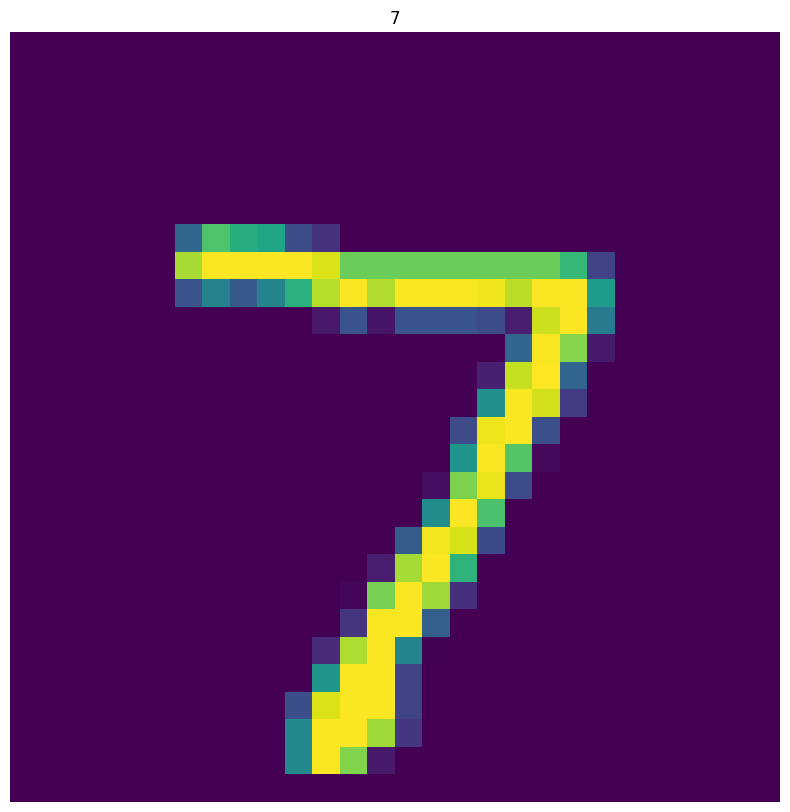

In [17]:
# Selecciona un numero al azar dentro de x_test
index = 0

plt.figure(figsize=(10, 10))
d_image = X_test[index]
plt.imshow(d_image.reshape(28, 28))
# Para verlo como array
# plt.title(y_test[index])

# Para ver el numero como tal
plt.title(np.argmax(y_test[index], axis=-1))

plt.axis(False)
plt.show()

In [18]:
prediccion_array = model.predict(X_test[index].reshape(1, 28*28))

print("El numero es: ", np.argmax(prediccion_array, axis=-1), 'cierto?')

1/1 [==============================] - 0s 49ms/step
El numero es:  [7] cierto?


## Guardar el modelo para usarlo después

Finalmente como paso extra, podemos exportar el modelo con todos los pesos, arquitectura y su compilación para cargar después y ponerlo a clasificar lo que nosotros queramos.

In [19]:
model.save('.././src/models/predict_model/')

INFO:tensorflow:Assets written to: .././src/models/predict_model/assets


INFO:tensorflow:Assets written to: .././src/models/predict_model/assets
